In [1]:
import Starbucks as sbs
import numpy as np
import numpy.random
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import Person as ppl
import Employee as emp
from scipy.optimize import minimize, basinhopping
import seaborn as sns

In [2]:
bar_to_cash_ratio = pd.read_csv("bar-to-cash-ratios.csv", index_col = 0)
cash_to_bar_ratio = pd.read_csv("cash-to_bar-ratios.csv",index_col=0)
p_mobiles = [0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
p_coffees = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]

In [3]:
bar_to_cash_ratio


,0.2,0.25,0.3,0.35,0.4,0.45,0.5
0.10,4.256258,1.978468,1.782588,0.500000,2.460296,1.140262,5.732035
0.15,2.630956,1.865063,0.835007,4.280720,2.319117,1.133893,1.897491
0.20,1.955936,1.723798,1.681412,1.361076,1.673683,0.960069,1.427688
0.25,1.707688,3.305227,1.483878,1.800852,1.129324,1.118291,1.608962
0.30,1.935922,1.252154,2.590361,1.408546,4.171894,1.466752,1.997170
0.35,1.250662,1.328574,0.355732,1.711066,4.717839,2.488766,0.661855
0.40,2.281234,4.762860,0.977078,2.352103,0.865575,4.160477,2.264847


In [4]:
cash_to_bar_ratio

,0.2,0.25,0.3,0.35,0.4,0.45,0.5
0.10,4.189052,0.975286,0.997578,1.000000,2.078774,0.899050,4.150316
0.15,3.175849,2.325720,0.597336,1.279783,2.220248,0.049101,0.978006
0.20,1.321722,1.615157,0.716011,1.047496,1.287619,2.844077,5.631070
0.25,0.692649,0.584668,2.497068,1.746397,0.862524,2.223775,1.979290
0.30,0.479074,2.395480,0.841716,1.953072,5.419443,0.507236,0.600381
0.35,1.612846,1.104081,0.502215,2.778562,0.726248,2.795349,0.919283
0.40,0.350988,1.784461,2.598694,0.808276,1.034656,0.416597,7.802921


# Run Basic Simulation

In [77]:
#Run simulation

original_stbks = sbs.Starbucks()
starbucksArrivalRate = 75
pMobile = 0.3
pCoffee = 0.1
cashRate = 62
barRate = 17.5
simDuration = 100
cTotal = 6
initialCashC = 1
numCashReg = 2 
meanPatienceTime = np.inf
vacationMeanLength = 0
switchRatioCashtoBar = 0#0.997578
switchRatioBartoCash = 0#1.782588
np.random.seed(0)
original_stbks.simulation(starbucksArrivalRate, 
                     pMobile,   
                     pCoffee , 
                     cashRate, 
                     barRate ,     
                     simDuration, 
                     cTotal, 
                     initialCashC, 
                     numCashReg,
                     switchRatioCashtoBar, 
                     switchRatioBartoCash, 
                     meanPatienceTime, 
                     vacationMeanLength,
                     isBalkingSystem = False)

In [54]:
def run_original_simulation(p_mobile, p_coffee):
    #Run simulation
    
    original_stbks = sbs.Starbucks()
    starbucksArrivalRate = 75
    pMobile = p_mobile
    pCoffee = p_coffee
    cashRate = 62
    barRate = 17.5
    simDuration = 50
    cTotal = 6
    initialCashC = 1
    numCashReg = 2 
    meanPatienceTime = np.inf
    vacationMeanLength = 0
    switchRatioCashtoBar = 1
    switchRatioBartoCash = 2
    #np.random.seed(10)
    original_stbks.simulation(starbucksArrivalRate, 
                         pMobile,   
                         pCoffee , 
                         cashRate, 
                         barRate ,     
                         simDuration, 
                         cTotal, 
                         initialCashC, 
                         numCashReg,
                         switchRatioCashtoBar, 
                         switchRatioBartoCash, 
                         meanPatienceTime, 
                         vacationMeanLength,
                        isBalkingSystem = False)
    return(original_stbks)

# Run Simulation with Switching

In [40]:
#Run simulation
i = 2 #pmobile = 0.3
j = 0 #pcoffee = 0.1
switching_stbks = sbs.Starbucks()
starbucksArrivalRate = 75
pMobile = 0.3
pCoffee = 0.1
cashRate = 62
barRate = 17.5
simDuration = 100
cTotal = 5
initialCashC = 1
numCashReg = 2 
meanPatienceTime = np.inf 
vacationMeanLength = 0
switchRatioCashtoBar = 1
switchRatioBartoCash = 1.78
#np.random.seed(0)
switching_stbks.simulation(starbucksArrivalRate, 
                     pMobile,   
                     pCoffee , 
                     cashRate, 
                     barRate ,     
                     simDuration, 
                     cTotal, 
                     initialCashC, 
                     numCashReg,
                     switchRatioCashtoBar, 
                     switchRatioBartoCash, 
                     meanPatienceTime, 
                     vacationMeanLength,
                    isBalkingSystem = False)

In [41]:
def run_switching_simulation(p_mobile, p_coffee):
    #Run simulation

    switching_stbks = sbs.Starbucks()
    starbucksArrivalRate = 75
    pMobile = p_mobile
    pCoffee = p_coffee
    cashRate = 62
    barRate = 17.5
    simDuration = 100
    cTotal = 5
    initialCashC = 1
    numCashReg = 2 
    meanPatienceTime = 100 
    vacationMeanLength = 1
    switchRatioCashtoBar = bar_to_cash_ratio.loc[p_coffee,str(p_mobile)]
    switchRatioBartoCash = cash_to_bar_ratio.loc[p_coffee,str(p_mobile)]
    #np.random.seed(10)
    switching_stbks.simulation(starbucksArrivalRate, 
                         pMobile,   
                         pCoffee , 
                         cashRate, 
                         barRate ,     
                         simDuration, 
                         cTotal, 
                         initialCashC, 
                         numCashReg,
                         switchRatioCashtoBar, 
                         switchRatioBartoCash, 
                         meanPatienceTime, 
                         vacationMeanLength)
    return(switching_stbks)

In [42]:
def calc_metrics(analysisSim):
    #analysisSim is the simulation run with the parameters of choice
    
    number_entered_bar_while_in_cash = calc_mobile_orders_passing_physical(analysisSim)
    mobile_orders_bypassing_physical = number_entered_bar_while_in_cash.mean()
    mob_time, phy_time = calc_time_in_starbucks(analysisSim)
    time_in_stbks_mobile=mob_time
    time_in_stbks_physical = phy_time
    bar_q, cash_q = calc_mean_queue_length(analysisSim)

    avg_queue_bar = bar_q
    avg_queue_cash = cash_q
    utilization = calc_utilization_rate(analysisSim)
    data = np.array([float(mobile_orders_bypassing_physical), time_in_stbks_mobile, time_in_stbks_physical, avg_queue_bar, avg_queue_cash,utilization]).reshape(1,6)
    #data = np.array([float(mobile_orders_bypassing_physical), time_in_stbks_mobile, time_in_stbks_physical, avg_queue_bar, avg_queue_cash,utilization]).T
    results = pd.DataFrame(data, columns=['Num of Mobile Bypassing Physical','Avg Time in Starbucks Mobile Customer' , 'Avg Time in Starbucks Physical Customer', 'Avg Num in Bar Queue', 'Avg Num in Cash Queue', 'Server Utilization'])
    #return(mobile_orders_bypassing_physical, time_in_stbks_mobile, time_in_stbks_physical, avg_queue_bar, avg_queue_cash)
    return(results)

In [43]:
def calc_mobile_orders_passing_physical(simulation):
    #time mobile customers enter the bar queue
    times_enter_bar = simulation.mobileCustomersEnterTime
    # list of people that have exited the cash
    ppl_completed_cash = simulation.completedCustomersCash
    num_enter_box_while_waiting_in_cash_queue = []
    for ppl in ppl_completed_cash:
        num = 0
        time_enter_cash = ppl.timeEnterCashQ
        time_exit_cash = ppl.timeExitCashSys
        for time in times_enter_bar:
            if time < time_exit_cash and time > time_enter_cash:
                num +=1
        num_enter_box_while_waiting_in_cash_queue.append(num)
    num_enter_box_while_waiting_in_cash_queue = pd.DataFrame(num_enter_box_while_waiting_in_cash_queue)
    
    return(num_enter_box_while_waiting_in_cash_queue)

In [44]:
def calc_mean_queue_length(simulation):
    times = simulation.times
    bar_queue = simulation.barqlength
    cash_queue = simulation.cashqlength
 
    avg_bar_queue = np.sum(np.subtract(times[1:], times[0:-1])*bar_queue[1:])/times[-1]
    avg_cash_queue = np.sum(np.subtract(times[1:], times[0:-1])*cash_queue[1:])/times[-1]
    return(float(avg_bar_queue), float(avg_cash_queue))
    

In [45]:
def calc_time_in_starbucks_coffee(simulation):
    completed_customers = simulation.completedCustomers
    time_in_stbks_coffee = []
  
    for ppl in completed_customers:
        
        if ppl.coffee ==1:
            time_in_stbks_coffee.append(ppl.timeExitStbks - ppl.timeEnterStbks)
        
    
    time_in_stbks_coffee =pd.DataFrame(time_in_stbks_coffee, columns=['Physical'])
        
    return(float(time_in_stbks_coffee.mean()))
    

In [46]:
def calc_time_in_starbucks(simulation):
    completed_customers = simulation.completedCustomers
    time_in_stbks_mobile = []
    time_in_stbks_physical = []
    for ppl in completed_customers:
        #mobile customer
        if ppl.mobile ==1:
            time_in_stbks_mobile.append(ppl.timeExitStbks - ppl.timeEnterStbks)
        else:
            time_in_stbks_physical.append(ppl.timeExitStbks - ppl.timeEnterStbks)
    
    time_in_stbks_physical =pd.DataFrame(time_in_stbks_physical, columns=['Physical'])
    time_in_stbks_mobile =pd.DataFrame(time_in_stbks_mobile, columns=['Mobile'])
    
    return(float(time_in_stbks_mobile.mean()), float(time_in_stbks_physical.mean()))

In [47]:
def calc_utilization_rate(simulation):
    #calculate the percentage of time a server is busy
    total_occupied_servers=[]
    for i in range(0,len(simulation.times)):
        total_occupied_servers.append(simulation.numberOccupiedServersBar[i] + simulation.numberOccupiedServersCash[i])
    times = simulation.times
    rho = (np.sum(np.subtract(times[1:], times[0:-1])*total_occupied_servers[1:])/times[-1])/simulation.cTotal
    return(rho)

In [48]:
def calc_percent_improvements(original_stbks, switching_stbks):
    original_results = calc_metrics(original_stbks)
    switching_results = calc_metrics(switching_stbks)
    percent_improvements = 100*(switching_results - original_results)/original_results
    return(percent_improvements)

# Comparison Collegetown Stbks

In [55]:
#Original Starbucks Without Switching
original_results_collegetown = calc_metrics(original_stbks)
#original Starbucks With Switching
switching_results_collegetown = calc_metrics(switching_stbks)
calc_metrics(original_stbks)

,Num of Mobile Bypassing Physical,Avg Time in Starbucks Mobile Customer,Avg Time in Starbucks Physical Customer,Avg Num in Bar Queue,Avg Num in Cash Queue,Server Utilization
0,1.188893,0.073713,0.118174,0.960687,1.993816,0.827938


In [56]:
calc_metrics(switching_stbks)

,Num of Mobile Bypassing Physical,Avg Time in Starbucks Mobile Customer,Avg Time in Starbucks Physical Customer,Avg Num in Bar Queue,Avg Num in Cash Queue,Server Utilization
0,6.713099,0.223811,0.506761,11.528058,15.398606,0.987796


In [51]:
percent_improvements_collegetown = calc_percent_improvements(original_stbks,switching_stbks)
percent_improvements_collegetown

,Num of Mobile Bypassing Physical,Avg Time in Starbucks Mobile Customer,Avg Time in Starbucks Physical Customer,Avg Num in Bar Queue,Avg Num in Cash Queue,Server Utilization
0,464.651217,203.626092,328.826459,1099.980588,672.318446,19.308041


In [52]:
percent_improvements_collegetown.to_csv('Percent Improvements Collegetown Starbucks.csv')
original_results_collegetown.to_csv('Original Operating Results.csv')
switching_results_collegetown.to_csv('Switching Operating Results.csv')

# For Pcoffee = 0.1, Pmobile = [0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]

In [118]:
p_coffee = 0.1
p_mobiles = np.arange(0.2, 1, 0.1)#[0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]

In [158]:
calc_metrics(run_original_simulation(0.3,0.1))

,Num of Mobile Bypassing Physical,Avg Time in Starbucks Mobile Customer,Avg Time in Starbucks Physical Customer,Avg Num in Bar Queue,Avg Num in Cash Queue,Server Utilization
0,2.922731,0.092971,0.219109,2.556845,6.308347,0.822343


In [159]:
calc_metrics(run_original_simulation(0.9,0.1))

,Num of Mobile Bypassing Physical,Avg Time in Starbucks Mobile Customer,Avg Time in Starbucks Physical Customer,Avg Num in Bar Queue,Avg Num in Cash Queue,Server Utilization
0,1.28,0.125931,0.135415,4.961333,0.016379,0.756027


In [138]:
#Only increasing pmobile
percent_improvements_pmobile_no_switching = pd.DataFrame( columns=['Num of Mobile Bypassing Physical','Avg Time in Starbucks Mobile Customer' , 'Avg Time in Starbucks Physical Customer', 'Avg Num in Bar Queue', 'Avg Num in Cash Queue','Server Utilization'])
percent_improvements_pmobile_with_switching = pd.DataFrame( columns=['Num of Mobile Bypassing Physical','Avg Time in Starbucks Mobile Customer' , 'Avg Time in Starbucks Physical Customer', 'Avg Num in Bar Queue', 'Avg Num in Cash Queue','Server Utilization'])
metrics_no_switching = pd.DataFrame( columns=['Num of Mobile Bypassing Physical','Avg Time in Starbucks Mobile Customer' , 'Avg Time in Starbucks Physical Customer', 'Avg Num in Bar Queue', 'Avg Num in Cash Queue','Server Utilization'])
metrics_with_switching = pd.DataFrame( columns=['Num of Mobile Bypassing Physical','Avg Time in Starbucks Mobile Customer' , 'Avg Time in Starbucks Physical Customer', 'Avg Num in Bar Queue', 'Avg Num in Cash Queue','Server Utilization'])
 

original_stbks = run_original_simulation(0.3,0.1)
original_stbks_with_switching = run_switching_simulation(0.3,0.1)
for i in range(0,len(p_mobiles)):
    p_coffee = 0.1
    #p_mobiles = [0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
    p_mobile = p_mobiles[i]
    #original_stbks = run_original_simulation(p_mobile, p_coffee)
    
    #changed p_mobile and switching
    #switching_stbks = run_switching_simulation(p_mobile, p_coffee)
    #changed p_mobile but no switching 
    no_switching_stbks = run_original_simulation(p_mobile, p_coffee)
    
    #percent_improvement_with_switching = calc_percent_improvements(original_stbks,switching_stbks)
    percent_improvement_without_switching = calc_percent_improvements(original_stbks,no_switching_stbks)
    metrics_no_switching = metrics_no_switching.append(calc_metrics(no_switching_stbks))
    #percent_improvements_pmobile_with_switching = percent_improvements_pmobile_with_switching.append(percent_improvement_with_switching)
    percent_improvements_pmobile_no_switching = percent_improvements_pmobile_no_switching.append(percent_improvement_without_switching)
    #metrics_with_switching = metrics_with_switching.append(calc_metrics(switching_stbks)) 

In [139]:
percent_improvements_pmobile_no_switching

,Num of Mobile Bypassing Physical,Avg Time in Starbucks Mobile Customer,Avg Time in Starbucks Physical Customer,Avg Num in Bar Queue,Avg Num in Cash Queue,Server Utilization
0,51.014916,-1.621866,77.327436,-15.944155,190.404599,1.263532
0,-30.903833,9.294268,-17.905003,19.105855,-37.337058,2.809955
0,-32.537705,2.398774,-28.930295,7.150503,-63.756205,-0.487811
0,-33.767160,2.016965,-37.360839,7.046312,-81.419232,-0.618907
0,-49.944806,14.020675,-38.346729,30.483881,-91.926023,-2.213119
0,-56.937828,8.138580,-44.286894,15.406218,-97.126331,-5.884105
0,-48.620237,14.421881,-40.945173,40.749138,-98.276820,-7.119881
0,-52.246399,31.025215,-34.024125,92.325444,-99.658824,-7.361667


# Plot Average Time in Starbucks Mobile and Physical (Percent Improvement)
 one line mobile improvement, one like physical improvement


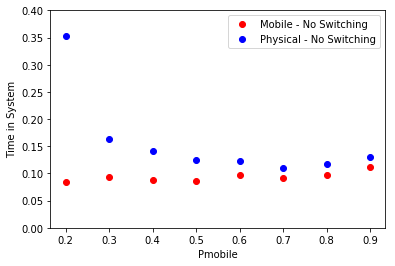

In [143]:
#plt.plot(0.3,0, 'ro', label = 'Current')
#plt.plot(p_mobiles,metrics_with_switching['Avg Time in Starbucks Mobile Customer'], label = 'Mobile - Optimal Switching')
#plt.plot(p_mobiles,metrics_with_switching['Avg Time in Starbucks Physical Customer'], label = 'Physical - Optimal Switching')
plt.plot(p_mobiles,metrics_no_switching['Avg Time in Starbucks Mobile Customer'], 'ro', label = 'Mobile - No Switching')
plt.plot(p_mobiles,metrics_no_switching['Avg Time in Starbucks Physical Customer'], 'bo',label = 'Physical - No Switching')
plt.legend()
plt.xlabel('Pmobile')
plt.ylabel('Time in System')
plt.ylim(0,0.40)
#plt.title('Time in System as Percent of Mobile Orders Changes')
plt.savefig('Time in System as pMobile changes.png')

# Average Queue Length Mobile and Physical (Percent Improvement)

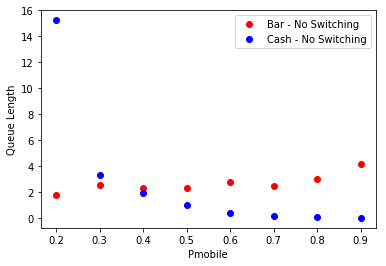

In [141]:
#plt.plot(0.3,0, 'ro', label = 'Current')
#plt.plot(p_mobiles,metrics_with_switching['Avg Num in Bar Queue'], label = 'Bar - Optimal Switching')
#plt.plot(p_mobiles,metrics_with_switching['Avg Num in Cash Queue'], label = 'Cash - Optimal Switching')
plt.plot(p_mobiles,metrics_no_switching['Avg Num in Bar Queue'], 'ro', label = 'Bar - No Switching')
plt.plot(p_mobiles,metrics_no_switching['Avg Num in Cash Queue'],'bo', label = 'Cash - No Switching')
plt.legend()
plt.xlabel('Pmobile')
plt.ylabel('Queue Length')
#plt.title('Queue Length as Percent of Mobile Orders Changes')
plt.savefig('Queue Length as pMobile changes.png')

# Utilization Rate

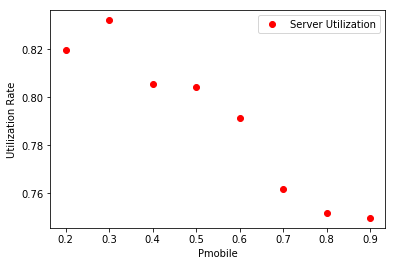

In [142]:
#plt.plot(0.3,0, 'ro', label = 'Current')
plt.plot(p_mobiles,metrics_no_switching['Server Utilization'],'ro')
plt.legend()
plt.xlabel('Pmobile')
plt.ylabel('Utilization Rate')
#plt.title('Utilization Rate as Percentage of Mobile Orders Change')
plt.savefig('utilization as pMobile changes.png')

In [164]:
p_1 = calc_metrics(run_original_simulation(0.3,0.1))
p_1.to_csv('pmobile 0.3 results.csv')

In [165]:
p_9 = calc_metrics(run_original_simulation(0.9,0.1))
p_9.to_csv('pmobile 0.9 result.csv')

In [ ]:
plt.plot(p_mobiles,metrics_no_switching['Num of Mobile Bypassing Physical'], 'ro')
plt.xlabel('Pmobile')
plt.ylable('Number of Mobile Customers Bypassing Physical')